In [1]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv("music_genre_dataset_30s.csv")
dataset

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.418329,0.082801,0.115748,0.002513,3257.126965,3.887565e+05,2898.084210,93310.719774,6681.101267,1.591188e+06,...,46.933086,-4.382923,38.702278,-3.656522,49.483871,-2.090623,55.359150,-0.309847,57.257088,disco
1,0.415018,0.079964,0.100276,0.001005,2129.345892,3.264621e+05,2109.251346,157488.153219,4424.306580,1.696188e+06,...,37.088688,-10.317460,38.488674,0.562174,42.144817,-4.165685,62.671150,3.474561,61.359787,disco
2,0.422350,0.086362,0.084770,0.001776,2292.577701,4.294264e+05,2348.189625,98004.518456,5038.611199,1.788979e+06,...,43.149803,-0.299343,62.861038,7.594323,65.570488,0.656211,64.619171,0.808019,70.405159,disco
3,0.418398,0.079731,0.169954,0.004641,3168.111241,6.714721e+05,3047.644241,80215.866555,6935.358063,1.700916e+06,...,33.450310,-4.742950,31.193550,-5.763996,25.358912,-4.029355,25.142729,-5.362603,24.831554,disco
4,0.406329,0.081726,0.114499,0.001661,1975.227458,3.506591e+05,2090.041185,180429.392292,4251.482625,1.959344e+06,...,41.154961,-8.094254,36.756260,0.369473,43.412495,-3.240159,56.398613,3.585284,61.408413,disco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.347014,0.099040,0.169027,0.012304,3647.859402,1.089060e+06,2886.660401,188246.264824,7112.756990,2.336854e+06,...,189.243149,9.384404,215.534134,5.292024,243.840973,-2.935119,166.389130,-5.572682,104.770126,pop
995,0.408683,0.091592,0.245707,0.013573,3262.912445,1.229145e+06,2930.999782,192729.395087,6714.734397,3.538959e+06,...,81.972435,-0.418653,74.181114,-4.012816,71.696960,4.379142,125.709778,4.460430,119.418129,pop
996,0.258113,0.086931,0.083297,0.001239,2053.894371,6.865231e+05,2559.593931,158111.030253,4508.022741,3.431061e+06,...,102.404015,-7.749784,134.610657,-5.138517,181.699707,-1.829953,159.478088,-4.416521,166.494293,pop
997,0.395405,0.089837,0.208364,0.006605,3046.239800,1.376397e+06,3095.386506,187154.233463,6630.418240,3.863157e+06,...,54.425793,-0.950998,52.860306,-1.014983,56.542522,-0.463334,52.958145,-0.749381,66.957039,pop


In [3]:
dataset = dataset.sample(frac=1, random_state=0)
dataset

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
722,0.436589,0.082922,0.122564,0.001588,2330.839629,276720.087937,2664.205682,70025.059452,5837.598034,1.157663e+06,...,51.057602,-7.885718,49.304031,2.873649,67.309570,-4.346151,51.744328,-1.117504,51.443947,hiphop
77,0.367067,0.087567,0.147529,0.003186,3075.059150,384631.390872,3031.881215,119203.774222,6848.758586,2.000379e+06,...,68.472755,0.454339,77.115799,-2.272671,94.264473,2.979290,108.542183,-0.018868,106.826454,disco
877,0.335083,0.084427,0.156589,0.002376,1711.210422,167635.782598,1873.560298,89305.586467,3556.486828,1.056608e+06,...,47.350437,-4.385612,54.741600,2.545406,49.586662,-5.366111,47.807098,-5.970070,40.435268,country
613,0.266479,0.085465,0.060132,0.000456,1884.943901,299817.843539,2230.243952,106168.039790,4355.815328,1.694579e+06,...,36.078274,-6.210600,33.555119,0.863653,40.713032,-3.390311,57.052147,-0.381504,62.500145,jazz
903,0.310932,0.084932,0.198567,0.007017,2806.432726,809557.673435,2857.788083,278770.543581,6102.421433,4.097902e+06,...,35.856430,0.849044,82.446243,-1.232440,132.378067,2.538912,89.718033,0.780242,54.968365,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.328587,0.082342,0.131401,0.001641,1513.196623,93585.453931,1558.115001,63188.050680,2922.698994,4.731269e+05,...,50.475506,-9.803432,63.192856,0.160601,58.373646,-3.454817,45.670612,-7.419519,46.855621,country
192,0.482631,0.069669,0.232460,0.001128,3108.676757,107618.296390,2361.285862,46539.488353,5699.065539,4.041845e+05,...,37.322132,-7.143946,30.055050,4.640530,35.245300,-6.507180,44.408298,7.859061,33.443489,metal
629,0.300655,0.084077,0.022791,0.000239,1266.346202,302093.563851,1691.318454,217494.787369,2410.285425,1.780697e+06,...,44.031139,-5.196269,43.219231,-5.426081,45.702713,-3.129261,52.520981,-0.793945,98.309692,jazz
559,0.272810,0.082768,0.056977,0.000786,1932.837172,191479.213640,1740.233465,27335.836756,3573.161727,4.535105e+05,...,49.190601,2.992921,39.995598,3.541689,52.941269,-3.361932,87.026230,-3.678782,108.222778,classical


In [4]:
X = dataset.drop(columns=["label"])
y = dataset["label"]

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)
X

array([[ 1.05275782, -0.28018512, -0.12610792, ..., -0.38952873,
        -0.0059514 , -0.41190095],
       [ 0.20137389,  0.37258284,  0.25415788, ...,  1.13778088,
         0.28032707,  0.81285094],
       [-0.19031024, -0.06868549,  0.39215941, ..., -0.49540188,
        -1.27041549, -0.65535146],
       ...,
       [-0.6119242 , -0.11787145, -1.64584594, ..., -0.36864431,
         0.07836043,  0.62450771],
       [-0.95292109, -0.30182694, -1.12512626, ...,  0.55921112,
        -0.67336009,  0.84372983],
       [-1.37260015,  0.44622125, -0.59927342, ..., -0.62970654,
        -0.62737809, -0.35635457]])

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([4, 3, 2, 5, 7, 1, 0, 9, 3, 0, 5, 8, 9, 2, 7, 7, 9, 0, 0, 4, 7, 9,
       3, 7, 6, 8, 3, 8, 0, 4, 5, 8, 0, 0, 4, 4, 3, 2, 8, 8, 7, 1, 5, 3,
       8, 2, 4, 7, 9, 2, 0, 7, 9, 8, 2, 9, 9, 0, 2, 1, 2, 5, 6, 7, 4, 2,
       1, 4, 0, 7, 1, 0, 4, 0, 7, 9, 5, 9, 5, 8, 5, 8, 5, 8, 0, 0, 1, 0,
       8, 4, 7, 2, 9, 1, 8, 5, 7, 9, 1, 3, 6, 1, 5, 5, 4, 1, 6, 3, 1, 9,
       8, 6, 4, 9, 8, 7, 8, 7, 7, 1, 3, 2, 2, 5, 0, 2, 8, 9, 5, 9, 4, 4,
       4, 8, 3, 2, 2, 6, 4, 8, 0, 9, 9, 0, 9, 3, 3, 6, 3, 1, 7, 7, 4, 9,
       2, 9, 2, 0, 5, 2, 4, 1, 6, 1, 4, 8, 9, 4, 6, 8, 8, 2, 0, 0, 9, 6,
       4, 9, 1, 0, 8, 5, 4, 0, 0, 8, 7, 9, 2, 3, 9, 5, 4, 2, 5, 6, 8, 8,
       7, 9, 5, 7, 2, 2, 5, 2, 6, 7, 3, 7, 2, 0, 6, 6, 3, 0, 5, 8, 5, 5,
       9, 5, 1, 3, 4, 1, 1, 2, 8, 3, 3, 5, 6, 6, 0, 2, 8, 7, 7, 5, 9, 3,
       9, 4, 8, 2, 3, 9, 3, 7, 4, 8, 0, 2, 2, 3, 3, 7, 4, 4, 6, 9, 1, 2,
       9, 2, 9, 0, 0, 3, 6, 7, 7, 0, 1, 1, 6, 5, 9, 4, 2, 4, 3, 1, 5, 6,
       8, 5, 8, 4, 7, 2, 6, 1, 7, 5, 3, 6, 3, 1, 0,

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## **Support Vector Machine**

In [8]:
from sklearn.svm import SVC
svm = SVC(probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

In [9]:
pred_svm = svm.predict(X_test)
accuracy_score(y_test, pred_svm)

0.765

## **KNN**

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
pred_knn = knn.predict(X_test)
accuracy_score(y_test, pred_knn)

0.71

### **Make prediction from a new .wav file**

In [13]:
from functions import extract_features_audio
file_path = "GTZAN_dataset/classical/classical.00024.wav"
audio_data, sr = librosa.load(file_path, offset=0, duration=30)
features = extract_features_audio(audio_data, sr)

In [14]:
from functions import columns
# data normalization
test_frame = pd.DataFrame([features], columns=columns[:-1])
train_plus_test = pd.concat([dataset, test_frame])
train_plus_test = train_plus_test.drop(columns=["label"])
train_plus_test_norm = ss.fit_transform(train_plus_test)
test_frame_norm = train_plus_test_norm[-1]
test_frame_norm = np.array([test_frame_norm])

In [15]:
one_pred_svm = svm.predict(test_frame_norm)
one_pred_knn = knn.predict(test_frame_norm)

### **SVM prediction**

In [16]:
one_pred_svm

array([1])

In [17]:
le.inverse_transform(one_pred_svm)[0]

'classical'

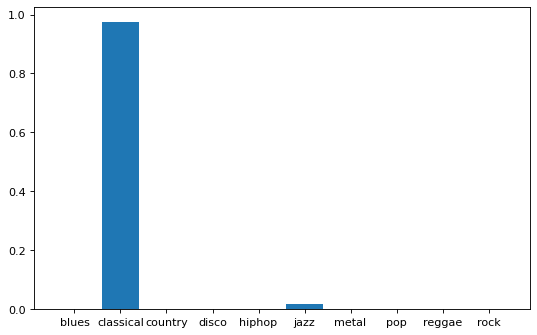

In [18]:
plt.figure(figsize=(8, 5), dpi=80)
plt.bar(le.inverse_transform([i for i in range(10)]), svm.predict_proba(test_frame_norm)[0])
plt.show()

### **KNN prediction**

In [38]:
one_pred_knn

array([[1]], dtype=int64)

In [20]:
le.inverse_transform(one_pred_knn)[0]

'classical'

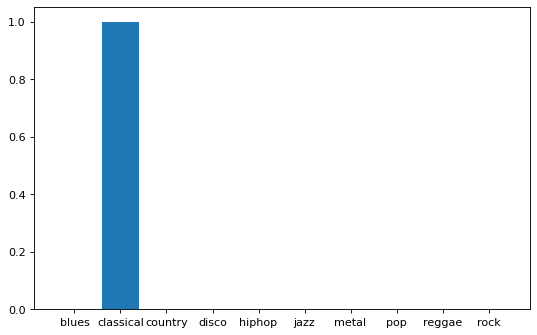

In [21]:
plt.figure(figsize=(8, 5), dpi=80)
plt.bar(le.inverse_transform([i for i in range(10)]), knn.predict_proba(test_frame_norm)[0])
plt.show()